In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import logging
import pickle

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import RobustScaler
from sklearn.utils import check_random_state

from recnn.preprocessing import permute_by_pt
from recnn.preprocessing import rotate
from recnn.recnn import grnn_predict_gated

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8,8)

In [3]:
filename_train = "../data/w-vs-qcd/kt-train.pickle"
filename_test = "../data/w-vs-qcd/kt-test.pickle"
filename_model = "../models/w-vs-qcd-20160614.pickle"

In [4]:
rng = check_random_state(1)

In [5]:
# Make training data
print("Loading training data...")

fd = open(filename_train, "rb")
X, y = pickle.load(fd)
fd.close()
y = np.array(y)

print("\tfilename = %s" % filename_train)
print("\tX size = %d" % len(X))
print("\ty size = %d" % len(y))

Loading training data...
	filename = ../data/w-vs-qcd/kt-train.pickle
	X size = 80000
	y size = 80000


In [6]:
# Preprocessing 
print("Preprocessing...")
X = [rotate(permute_by_pt(jet)) for jet in X]
tf = RobustScaler().fit(np.vstack([jet["content"] for jet in X]))

for jet in X:
    jet["content"] = tf.transform(jet["content"])

Preprocessing...


In [7]:
# Make test data 
print("Loading test data...")

fd = open(filename_test, "rb")
X, y = pickle.load(fd)
fd.close()
y = np.array(y)

print("\tfilename = %s" % filename_test)
print("\tX size = %d" % len(X))
print("\ty size = %d" % len(y))

Loading test data...
	filename = ../data/w-vs-qcd/kt-test.pickle
	X size = 20000
	y size = 20000


In [8]:
# Preprocessing 
print("Preprocessing...")
X = [rotate(permute_by_pt(jet)) for jet in X]

for jet in X:
    jet["content"] = tf.transform(jet["content"])

Preprocessing...


In [9]:
# Loading model 
print("Loading model...")

fd = open(filename_model, "rb")
params = pickle.load(fd)
fd.close()

print("\tfilename = %s" % filename_model)

Loading model...
	filename = ../models/w-vs-qcd-20160614.pickle


In [10]:
# Cropping
print("Cropping...")

# X_ = X
# y_ = y

X_ = [j for j in X if 250 < j["pt"] < 300 and 50 < j["mass"] < 110]
y_ = [y[i] for i, j in enumerate(X) if 250 < j["pt"] < 300 and 50 < j["mass"] < 110]

Cropping...


In [11]:
# Testing 
print("Testing...")

predict = grnn_predict_gated
y_pred = predict(params, X_)

Testing...


# Roc curves

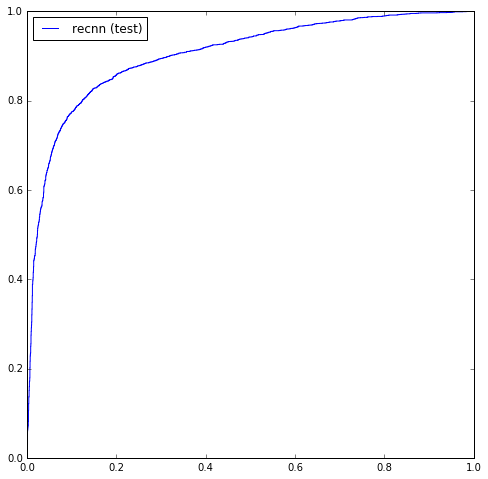

ROC AUC = 0.903925715981


In [12]:
# Make ROC curves
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(y_, y_pred)
plt.plot(fpr, tpr, label="recnn (test)")
plt.legend(loc="best")
plt.show()

print("ROC AUC =", roc_auc_score(y_, y_pred))

/home/gilles/anaconda3/envs/rec-nn/lib/python3.5/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


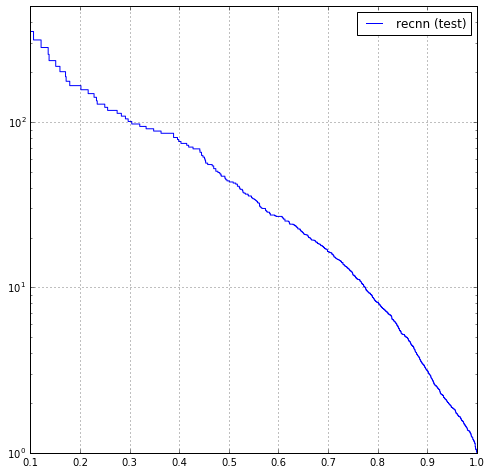

In [13]:
fpr, tpr, _ = roc_curve(y_, y_pred)
plt.plot(tpr, 1. / fpr, label="recnn (test)")

plt.xlim(0.1, 1.0)
plt.ylim(1, 500)
plt.yscale("log")
plt.grid()
plt.legend(loc="best")
plt.show()